In [2]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
# Use this command if you didn't save your credentials:
service = QiskitRuntimeService(channel="ibm_quantum", token="01bc4119753462f3d43233dd90a7f9abbc2919464ff5d986afceaac346f24ade5bde4f8bd38a1e44feaaf74996f1036d353eee6400b50194aff8571b2502547d")

In [14]:
#backend = service.backend("ibmq_qasm_simulator")
backend = service.backend("ibm_brisbane")

In [15]:
def oracle_gate(n, k):
    oracle_circuit = QuantumCircuit(n+1, name="Oracle")
    
    # Configurar el oráculo
    for qubit in range(n):
        if (k >> qubit) & 1:
            oracle_circuit.x(qubit)
    
    # Implementar el oráculo con compuertas CX (CNOT)
    oracle_circuit.cx(range(n), n)
    
    # Deshacer los cambios en la entrada
    for qubit in range(n):
        if (k >> qubit) & 1:
            oracle_circuit.x(qubit)
    
    return (oracle_circuit.to_gate(),oracle_circuit.draw(output="mpl"))

In [16]:
def grover_circuit(n, oracle_gate, iterations):
    grover_circuit = QuantumCircuit(n+1, n)
    
    # Inicializar los qubits en superposición
    grover_circuit.h(range(n+1))
    
    # Implementar Grover's algorithm
    for _ in range(iterations):
        grover_circuit.append(oracle_gate, range(n+1))
        grover_circuit.h(range(n+1))
        grover_circuit.x(range(n+1))
        grover_circuit.h(n)
        
        # Implementar el oráculo con compuertas CX (CNOT)
        grover_circuit.append(oracle_gate, range(n+1))
        
        grover_circuit.h(n)
        grover_circuit.x(range(n+1))
        grover_circuit.h(range(n+1))
    
    # Medir los qubits
    grover_circuit.measure(range(n), range(n))
    
    return (grover_circuit,grover_circuit.draw(output="mpl"))

In [17]:
# Lista de ejemplo

#Lista original
#lista = [25, 37, 47, 29, 8, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la primera posición
#lista = [8, 37, 47, 29, 25, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la última posición
lista = [25, 37, 47, 29, 22, 12, 44, 30, 24, 33, 15, 39, 46, 5, 8]
# Valor a buscar
k = 8

In [18]:
# Encontrar la posición de k en la lista
posicion = lista.index(k)

# Número de bits necesario para representar la lista
n = len(bin(max(lista))) - 2

In [19]:
# Crear el oráculo y el circuito de Grover
oracle,draw0 = oracle_gate(n, posicion)
grover_circuito,draw = grover_circuit(n, oracle, iterations=1)

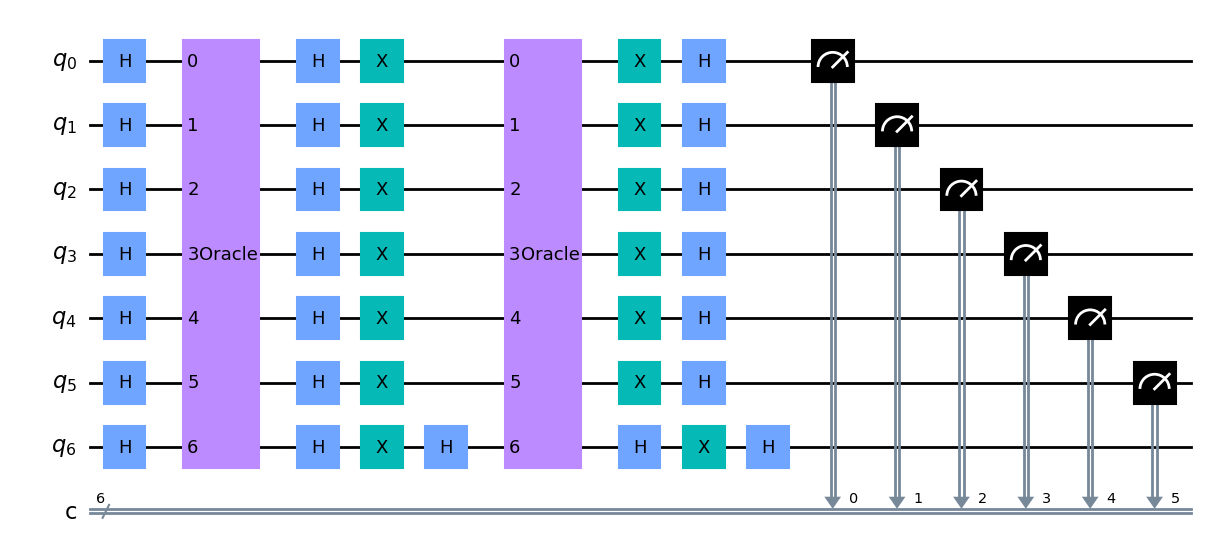

In [20]:
draw

In [21]:
job = Sampler(backend).run(transpile(grover_circuito, backend))
print(f"job id: {job.job_id()}")

job id: cne3zxfbh0w0008y0xwg


In [22]:
result = job.result()
print(result)

runtime_job._start_websocket_client:WARNING:2023-11-21 18:17:33,335: An error occurred while streaming results from the server for job cne3zxfbh0w0008y0xwg:
Traceback (most recent call last):
  File "C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit_ibm_runtime\runtime_job.py", line 531, in _start_websocket_client
    self._ws_client.job_results()
  File "C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit_ibm_provider\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit_ibm_provider\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ib

SamplerResult(quasi_dists=[{0: 0.004112088689604246, 1: 0.026686020426007456, 2: 0.020072902497147764, 3: 0.0029426089748275015, 4: 0.005575041770301116, 5: 0.020634046824469426, 6: 0.015336604455175464, 7: 0.0039218224904343565, 8: 0.006536936443082807, 9: 0.024961351340118655, 10: 0.02768276852154943, 11: 0.001666228648468929, 12: 0.0041174034681293655, 13: 0.02725590274962596, 14: 0.018779385648735502, 15: 0.005045486613915197, 16: 0.006196203253021119, 17: 0.03173378794410986, 18: 0.029611399500095028, 19: 0.005450569801590132, 20: 0.005783137235158493, 21: 0.031403091671047524, 22: 0.025265877986892255, 23: 0.004502408342873905, 24: 0.006421604107631881, 25: 0.03417118628848356, 26: 0.024896016588682443, 27: 0.007608418658509445, 28: 0.005163937408682065, 29: 0.02256186801435402, 30: 0.028126553182078934, 31: 0.004572022940686138, 32: 0.004182231231242684, 33: 0.025612907629928447, 34: 0.02297296444605177, 35: 0.006964428608130822, 36: 0.006847937041921187, 37: 0.02515637951526046

In [30]:
quasi_dist = result.quasi_dists[0]
#print(quasi_dist.binary_probabilities())
print(quasi_dist.keys())

dict_keys([39, 31, 46, 57, 38, 54, 27, 29, 3, 1, 41, 30, 21, 6, 36, 0, 43, 10, 2, 13, 42, 26, 62, 32, 61, 25, 52, 22, 50, 63, 34, 56, 58, 53, 17, 4, 23, 35, 9, 55, 7, 60, 51, 8, 18, 15, 11, 59, 12, 16, 47, 44, 49, 28, 20, 24, 45, 14, 40, 48, 37, 33, 5, 19])


In [10]:
# Simular el circuito
simulador = Aer.get_backend('qasm_simulator')
resultados = simulador.run(transpile(grover_circuito, simulador)).result()
conteos = resultados.get_counts()

In [31]:
import matplotlib.pyplot as plt
import numpy as np

estados= list(quasi_dist.keys())
values = list(quasi_dist.values())



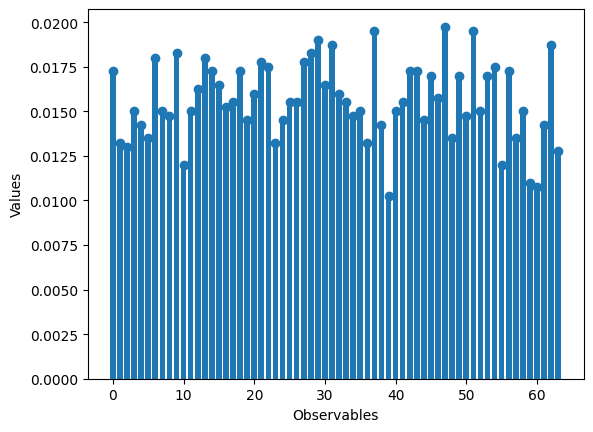

In [35]:
# plotting graph
plt.bar(estados,values)
plt.errorbar(estados, values, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

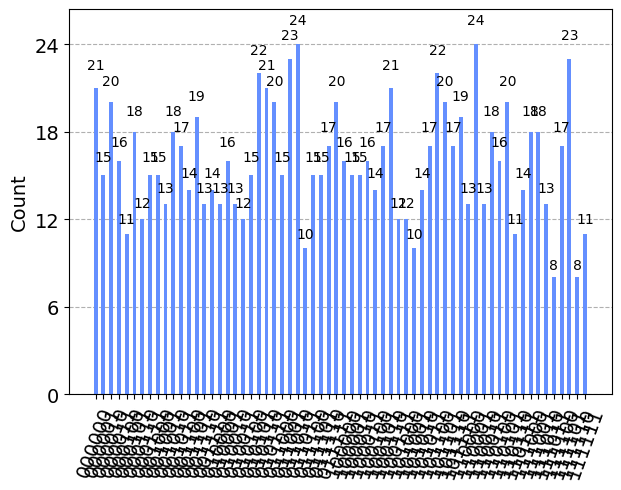

In [11]:
# Obtener los resultados y mostrar el histograma
plot_histogram(conteos)

In [12]:
# Encontrar la posición más probable
posicion_mas_probable = int(max(conteos, key=conteos.get), 2)

# Imprimir resultados
print("Posición de {} en la lista:".format(k), posicion_mas_probable)

Posición de 8 en la lista: 49


In [13]:
print(conteos)

{'000001': 15, '101010': 14, '110110': 11, '001001': 13, '010101': 22, '111110': 8, '001011': 17, '100010': 15, '111101': 23, '100011': 16, '001100': 14, '111010': 13, '001111': 14, '100110': 21, '001000': 15, '011110': 17, '110111': 14, '000000': 21, '010011': 12, '010001': 16, '010010': 13, '110000': 13, '000111': 15, '011001': 23, '010000': 13, '010110': 21, '000100': 11, '101101': 20, '110011': 18, '001110': 13, '111011': 8, '100101': 17, '001101': 19, '100100': 14, '111100': 17, '101011': 17, '000010': 20, '110101': 20, '011000': 15, '111111': 11, '100001': 15, '001010': 18, '101000': 12, '101111': 19, '110001': 24, '000110': 12, '110100': 16, '101100': 22, '000011': 16, '100000': 16, '011100': 15, '011010': 24, '111001': 18, '010111': 20, '111000': 18, '101110': 17, '110010': 13, '000101': 18, '101001': 10, '011111': 20, '011101': 15, '010100': 15, '011011': 10, '100111': 12}
